In [ ]:
import tensorflow as tf
import keras
from tensorflow import keras
from keras.layers import Dense # dence refers it is fully connected neural network, here all leayer ar connected each other 
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
data=keras.datasets.mnist.load_data() # load the dataset 
data

In [ ]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.mnist.load_data() # load the data set

In [ ]:
xtrain.ndim

In [ ]:
xtrain.shape # 

In [ ]:
xtrain[0] # show the pixel value of an image 

In [ ]:
ytrain.shape

In [ ]:
ytrain[8]

In [ ]:
ytrain.ndim

In [ ]:
xtest.shape

In [ ]:
xtest[0]

In [ ]:
ytest.shape

In [ ]:
xtest[1] # show the pixel value of an image 

In [ ]:
plt.matshow(xtest[1]) # Showing an image of index in 

In [ ]:
ytest[1] # showing the image value of index one 

In [ ]:
ytrain[10] # showing an image value

In [ ]:
sns.set(style='white')
plt.figure(figsize=(10,8))
plt.matshow(xtrain[10]) # showing an image
plt.title('digit image')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

# Normalizatin

In [ ]:
xtest=xtest/255 # dividing all xtext data by 255
xtrain=xtrain/255

In [ ]:
xtest
xtrain

In [ ]:
plt.matshow(xtest[1]) # after dividing 

# Flatten the image
flatten the image/reshape into 28*28 to 784

In [ ]:
xtrain=xtrain.reshape(-1,784) # converting 2D to 1D
xtest=xtest.reshape(-1,784)

In [ ]:
xtrain[0].shape

In [ ]:
xtrain[0].ndim

# Build the Model

| Note:

Duing sequential model

doing 3 layers(input, hidden nad output layer), 

number of neuron 64 in first 2 layers  and using relu function

number of neuron 64 in output layer and using softmax function

In [ ]:
model=keras.Sequential() # loding the model

Dense: https://keras.io/api/layers/core_layers/dense/

In [ ]:
# using add() to add individul layer
model.add(Dense(64,activation='relu',input_dim=784)) # Input layer  #input_dim which using to define the dimention of the image
model.add(Dense(64,activation='relu')) # hidden layer
model.add(Dense(10,activation='softmax')) # output layer 

# Loss calculation

In [ ]:
model.compile(
    optimizer='adam',
    loss='CategoricalCrossentropy',
    metrics=['accuracy'],
)

# train the model

Accuracy testing on training data

In [ ]:
model.fit(
    xtrain,
    to_categorical(ytrain),
    epochs=10,  # number of iteration
    batch_size=32,
    )

# Evaluate the mode
Accuracy testing on test data

In [ ]:
model.evaluate(xtest,to_categorical(ytest))

# Prediction 

In [ ]:
pred=model.predict(xtest) # xtest data predicting
pred

In [39]:
np.argmax(pred[0])

7

# Confusion matrix

313/313 [==============================] - 1s 4ms/step


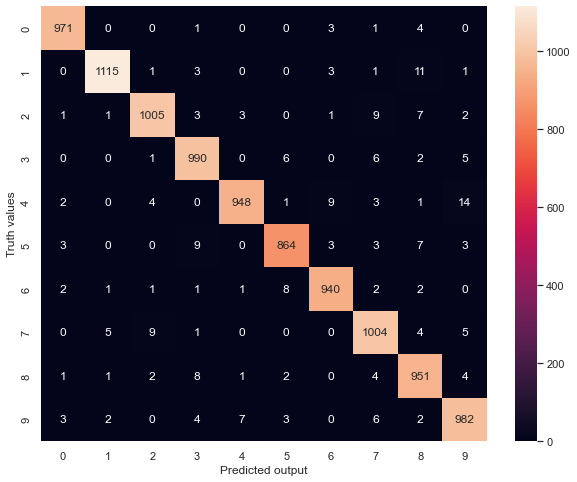

In [43]:
y_pred=model.predict(xtest)
ypred=[np.argmax(i) for i in y_pred]
con_matrix=tf.math.confusion_matrix(labels=ytest,predictions=ypred)
plt.figure(figsize=(10,8))
sns.heatmap(con_matrix,annot=True,fmt='d')
plt.xlabel('Predicted output')
plt.ylabel('Truth values')
plt.show()